## Visualize AMV Prediction Results

Visualizes output from the following scripts and runs

    -ML Baselines (NN_test_lead_ann_ImageNet_classification.py), 10 runs for each architecture
        1) "simplecnn" run
        2) "resnet50" run with unfreezeall=True
        3) "resnet50" run with unfreezeall=False
    -AutoML (autosklearn_calc_baseline_metrics.py)
    -Persistence Forecast Baseline (Persistence_Classification_Baseline.py)
    
After running the scripts with the above settings, move the output from "../../CESM_data/Metrics" to "../Data/Metrics/"

Figures are saved to "../Figures/"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.getcwd()




'/Users/gliu/Downloads/02_Research/01_Projects/04_Predict_AMV/03_Scripts/predict_amv/Analysis'

In [3]:
# Set Paths
cwdir = os.getcwd()
os.chdir(cwdir)

fpath      = "../Data/Metrics/"
outfigpath = "../../CESM_data/Figures/"

# Settings+Names for labeling/plotting, Data is formatted as [Class1, Class2, Class3]
classes   = ["AMV+","Neutral","AMV-"] # [Class1 = AMV+, Class2 = Neutral, Class3 = AMV-]
leads     = np.arange(0,25,3)
expnames  = ['simplecnn','resnet50(transfer)','resnet50(retrained)','FractalDB']
expcolors = ("b","orange","red","magenta") # Colors for line plots corresponding to each experiment
baseline  = 0.69476744 # Baseline value to plot

In [4]:
# Functions
def make_acc_heatmap(accbyclass,leads,title,classes,ax=None):
    """
    Plot heatmap of accuracy by leadtime
    Inputs
    ------
        accbyclass ARRAY [lead x class]
            accuracies by class, for each leadtime
        leads ARRAY [lead]
            array for each leadtime (for labeling ticks)
        title STR
            title for the plot
        classes ARRAY [class]
            name of each class
        ax (optional, default=None)
            axes to plot on. grabs current axes if none is specified
    
    """
    if ax is None:
        ax = plt.gca()
    
    im = ax.imshow(accbyclass[:,:].T,vmin=0.30,vmax=1,cmap='Blues')
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(leads)))
    ax.set_yticks(np.arange(len(classes)))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(leads)
    ax.set_yticklabels(classes)
    ax.set_title(title)
    ax.set_xlabel("Lead Time (Years)")
    fig.colorbar(im,ax=ax,fraction=0.016)
    
    for i in range(len(leads)):
        for j in range(len(classes)):
            if accbyclass[:,:][i,j] > 0.66:
                col = 'w'
            elif accbyclass[:,:][i,j] < 0.33:
                col = 'gray'
            else:
                col = 'k'
            text = ax.text(i, j, "%.2f" % (accbyclass[:,:])[i, j],
                           ha="center", va="center", color=col)
    return ax

def load_result(fn):
    """
    Load results for each of the variable names
    
    input: fn (str), Name of the file
    """
    
    ld = np.load(fn,allow_pickle=True)
    vnames = ld.files
    output = []
    for v in vnames:
        output.append(ld[v])
    return output,vnames

In [5]:
fpath

'../Data/Metrics/'

## Load Data

In [6]:
# Read in results

# Preallocate. Some quick definitions:
# model    : Network type [simplecnn,resnet50,resnet50(retrained)]
# run      : Run Number (1 to 10)
# leadtime : Leadtime in years, 0,24 in 3-year steps
totalacc = [] # Accuracy for all classes combined [model x run x leadtime]
classacc = [] # Accuracy by class [model x run x leadtime x class]
ypred    = [] # Predictions [model x run x leadtime x sample]
ylabs    = [] # Labels [model x run x leadtime x sample]
for m in range(4):
    
    #fpath = "../../CESM_data/Metrics/Classification/10run/"
    if m == 0:
        flist = glob.glob(fpath+"*simplecnn*.npz")
    elif m == 1:
        flist = glob.glob(fpath+"*resnet50*unfreeze_allFalse*.npz")
    elif m == 2:
        flist = glob.glob(fpath+"*resnet50*unfreeze_allTrue*.npz")
    elif m == 3:
        flist = glob.glob(fpath+"*fractaldb*unfreeze_allFalse*.npz")
        
    
    flist.sort()
    print('Found %i files'%(len(flist)))
    
    # Load Result for each model
    totalm = []
    classm = []
    ypredm = []
    ylabsm = []
    for i in range(10): # Load for 10 files
        
        output,vnames = load_result(flist[i])
        if m == 3:
            totalm.append(output[4][leads])
            classm.append(output[5][leads])
            ypredm.append(output[6][leads])
            ylabsm.append(output[7][leads])
        else:
            totalm.append(output[4])
            classm.append(output[5])
            ypredm.append(output[6])
            ylabsm.append(output[7])
        print("Loaded %s, %s, %s, and %s for run %i, model %s" % (vnames[4],vnames[5],vnames[6],vnames[7],i,expnames[m]))
    
    # Append to array
    totalacc.append(totalm)
    classacc.append(classm)
    ypred.append(ypredm)
    ylabs.append(ylabsm)

    
    
# # Turn results into arrays
totalacc = np.array(totalacc) # [model x run x lead]
classacc = np.array(classacc) # [model x run x lead x class]
ypred    = np.array(ypred)    # [model x run x lead x sample]
ylabs    = np.array(ylabs)    # [model x run x lead x sample]
# print(vnames)

Found 10 files
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 0, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 1, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 2, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 3, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 4, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 5, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 6, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 7, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 8, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 9, model simplecnn
Found 10 files
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 0, model resnet50(transfer)
Loaded total_acc, acc_by_class, yvalp

In [7]:
len(totalacc),len(totalacc[0][0]),len(totalacc[-1][0])

(4, 9, 9)

In [8]:
# Load data from automl results
autopath = "../automl/"
fna =  'automl_accuracy_t3600_classification.npy'
fnr  = 'automl_accuracy_t3600_regression.npy'
autodat = np.load(autopath+fna)
autor = np.load(autopath+fnr)
autodattotal = autodat.mean(1) # Calculte mean of 3 classes for total accuracy
autodat.shape

(25, 3)

Text(0.5, 1.0, 'Persistence Baseline')

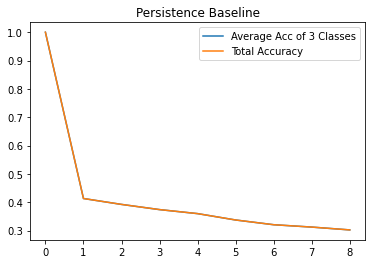

In [9]:
# Load data from persistence baseline
#fnp = "leadtime_testing_ALL_AMVClass3_PersistenceBaseline_1before_nens40_maxlead24_detrend0_noise0_nsample400_ALL_nsamples1.npz"
fnp="leadtime_testing_ALL_AMVClass3_PersistenceBaseline_1before_nens40_maxlead24_detrend0_noise0_nsample400_limitsamples1_ALL_nsamples1.npz"

ldp = np.load(fpath+fnp,allow_pickle=True)#.f#.arr_0

persaccclass = np.array(ldp['arr_0'][None][0]['acc_by_class']) # [Lead x Class]}
persacctotal = np.array(ldp['arr_0'][None][0]['total_acc'])

# Quick Test Plot
fig,ax = plt.subplots(1,1)
ax.plot(persaccclass.mean(1),label="Average Acc of 3 Classes")
ax.plot(persacctotal,label="Total Accuracy")
ax.legend()
ax.set_title("Persistence Baseline")

## Make Plots

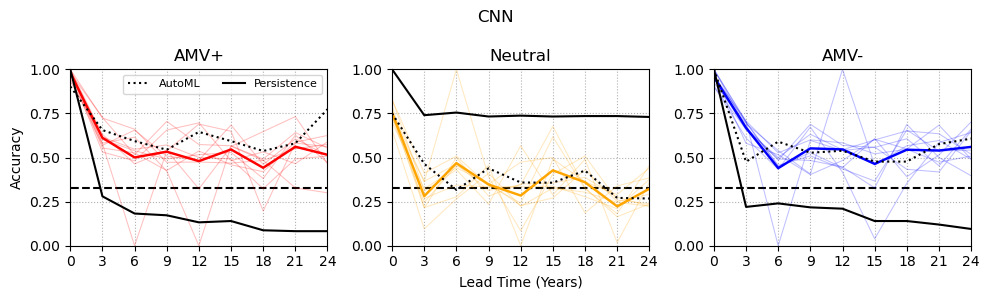

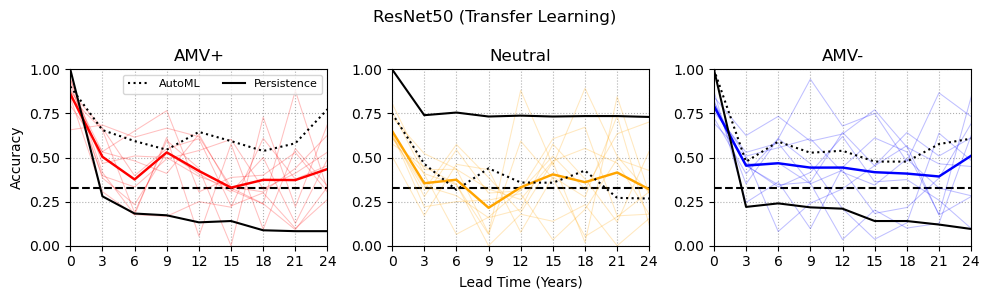

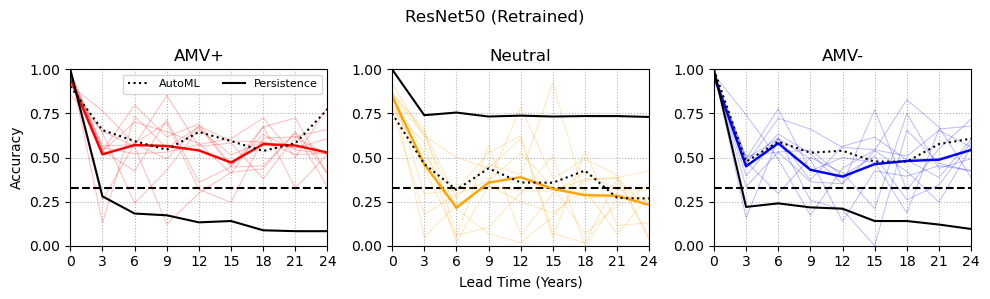

In [18]:
# Plot Accuracy vs Leadtime for each class, separate row for each model

pdark = False
if pdark:
    plt.style.use('dark_background')
else:
    plt.style.use('default')
classcol = ['r','orange','b']
classnamelong = ["CNN","ResNet50 (Transfer Learning)","ResNet50 (Retrained)","FractalDB"]
vertical = False # Set to True to plot the same model in each column


if vertical:
    for i in range(3): # Looping for each model type

        fig,axs = plt.subplots(3,1,figsize=(4,8))
        for c in range(3):
            ax = axs[c]

            if c == 1:
                ax.set_ylabel("Accuracy")
            if c == 2:
                ax.set_xlabel("Lead Time (Years)")

            ax.grid(True,ls='dotted')
            ax.set_xticks(leads)
            ax.set_yticks(np.arange(0,1.25,.25))
            ax.set_xlim(0,24)
            ax.set_title("%s (%s)" %(classes[c],expnames[i]))

            for r in range(10):  
                ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=0.75)
            ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=1)
            ax.hlines([0.33],xmin=-1,xmax=25,ls="dashed",color='k')
        plt.tight_layout()
        plt.savefig("%sAccbyClass_Leadtime_%s_vertical_update.png"% (outfigpath,expnames[i]),dpi=200)
else:
    for i in range(3): # Looping for each model type

        fig,axs = plt.subplots(1,3,figsize=(10,3))
        for c in range(3):
            ax = axs[c]

            if c == 0:
                ax.set_ylabel("Accuracy")
            if c == 1:
                ax.set_xlabel("Lead Time (Years)")

            ax.grid(True,ls='dotted')
            ax.set_xticks(leads)
            ax.set_yticks(np.arange(0,1.25,.25))
            ax.set_xlim(0,24)
            ax.set_title("%s" %(classes[c]))
            if pdark:
                for r in range(10):  
                    #ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=0.75)
                    ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.4,lw=0.75)
                ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=1.75)
                #ax.plot(np.arange(0,25,1),autodat[:,c],color='k',ls='dotted',label="AutoML")
                ax.plot(leads,autodat[::3,c],color='w',ls='dotted',label="AutoML")
                ax.plot(leads,persaccclass[:,c],color='w',label="Persistence")

                ax.hlines([0.33],xmin=-1,xmax=25,ls="dashed",color='w')
            else:
                for r in range(10):  
                    ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=0.75)
                ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=1.75)
                #ax.plot(np.arange(0,25,1),autodat[:,c],color='k',ls='dotted',label="AutoML")
                ax.plot(leads,autodat[::3,c],color='k',ls='dotted',label="AutoML")
                ax.plot(leads,persaccclass[:,c],color='k',label="Persistence")

                ax.hlines([0.33],xmin=-1,xmax=25,ls="dashed",color='k')
            ax.set_ylim([0,1])
            if c == 0:
                ax.legend(fontsize=8,ncol=3)
        plt.suptitle(classnamelong[i])
        plt.tight_layout()
        if pdark:
            plt.savefig("%sAccbyClass_Leadtime_%s_vertical_update_dark.png"% (outfigpath,expnames[i]),dpi=200,transparent=True)
        else:
            plt.savefig("%sAccbyClass_Leadtime_%s_vertical_update.png"% (outfigpath,expnames[i]),dpi=200)

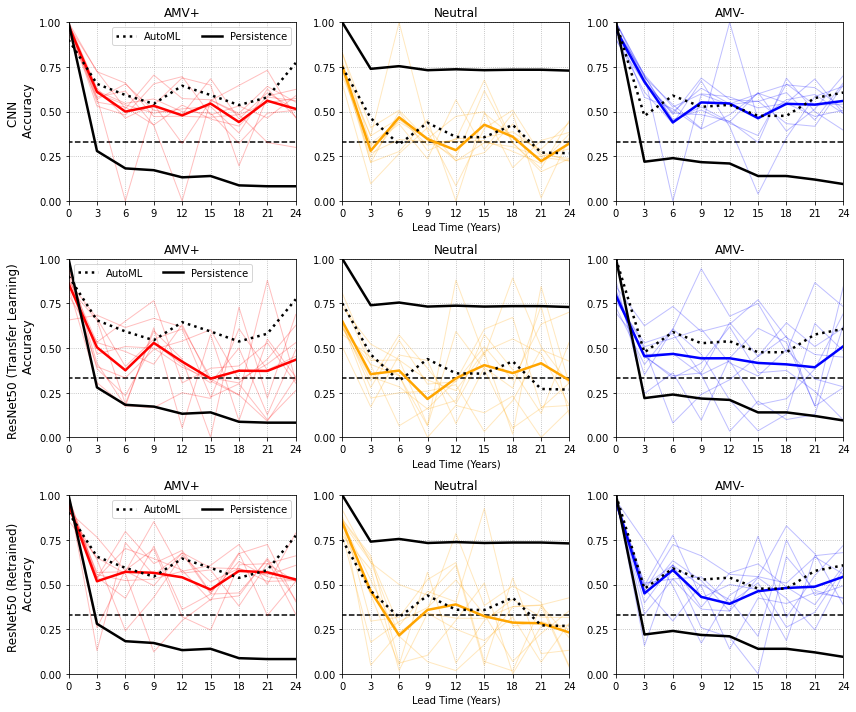

In [11]:
# Plot Accuracy vs Leadtime for each Predictor

classcol = ['r','orange','b']

fig,axsall = plt.subplots(3,3,figsize=(12,10))

lwall = 2.5
for i in range(3): # Looping for each model type
    
    axs = axsall[i,:]
    for c in range(3):
        ax = axs[c]

        if c == 0:
            ax.set_ylabel("%s \n Accuracy"%classnamelong[i],fontsize=12)
        if c == 1:
            ax.set_xlabel("Lead Time (Years)")

        ax.grid(True,ls='dotted')
        ax.set_xticks(leads)
        ax.set_yticks(np.arange(0,1.25,.25))
        ax.set_xlim(0,24)
        ax.set_title("%s" %(classes[c]),fontsize=12)

        for r in range(10):  
            ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=1)
        ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=lwall)
        #ax.plot(np.arange(0,25,1),autodat[:,c],color='k',ls='dotted',label="AutoML")
        ax.plot(leads,autodat[::3,c],color='k',ls='dotted',label="AutoML",lw=lwall)
        ax.plot(leads,persaccclass[:,c],color='k',label="Persistence",lw=lwall)

        ax.hlines([0.33],xmin=-1,xmax=25,ls="dashed",color='k')
        ax.set_ylim([0,1])
        if c == 0:
            ax.legend(fontsize=10,ncol=3)
    #plt.suptitle(expnames[i])
    plt.tight_layout()
plt.savefig("%sFig04_AccbyClass_Leadtime_Horizontal.png"% (outfigpath),dpi=150)

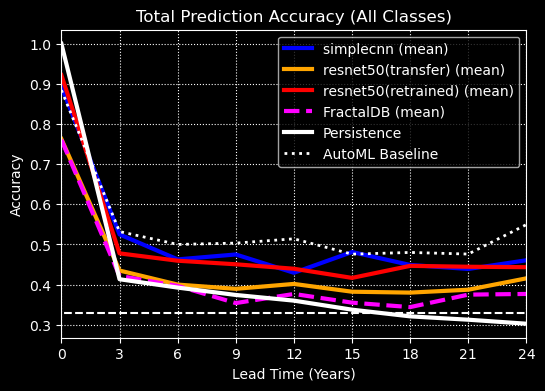

In [21]:
# Plot total accuracy by lead time for each of the 10 runs, comparing each model

pdark = True
if pdark:
    plt.style.use('dark_background')
    basecol = "w"
else:
    plt.style.use('default')
    basecol = "k"
    

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.grid(True,ls="dotted")
for m in range(4): 
    
    #ax.plot(leads,totalacc[m,:,:].T,label="",color=expcolors[m],alpha=0.1)
    if m == 3:
        ls='dashed'
    else:
        ls='solid'
    ax.plot(leads,totalacc[m,:,:].mean(0),label="%s (mean)"%expnames[m],color=expcolors[m],lw=3,ls=ls)
    

#ax.plot()
ax.plot(leads,persacctotal,color=basecol,label="Persistence",lw=3)
ax.plot(leads,autodattotal[::3],color=basecol,label="AutoML Baseline",ls='dotted',lw=2)
ax.legend()
ax.set_title("Total Prediction Accuracy (All Classes)")
ax.hlines([0.33],xmin=-1,xmax=26,ls='dashed',color=basecol)
ax.set_xlim([0,24])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Lead Time (Years)")
ax.set_xticks(leads)
if pdark:
    plt.savefig("%sFig05_TotalPredAcc_dark.png"%outfigpath,dpi=200,transparent=True)
else:
    plt.savefig("%sFig05_TotalPredAcc.png"%outfigpath,dpi=200)

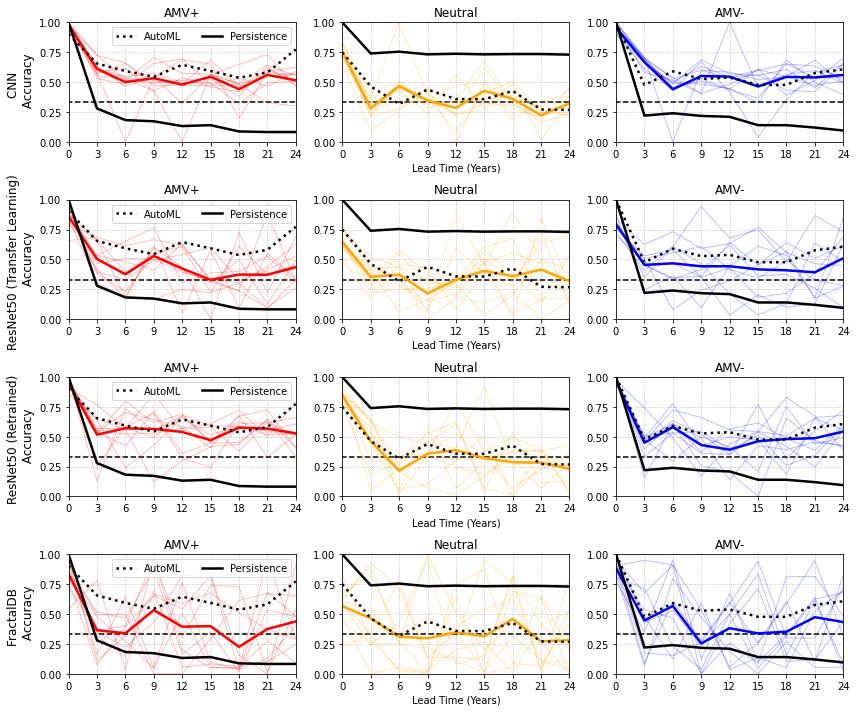

In [64]:
# Plot Accuracy vs Leadtime for each Predictor, and include FractalDB

classcol = ['r','orange','b']

fig,axsall = plt.subplots(4,3,figsize=(12,10))

lwall = 2.5
for i in range(4): # Looping for each model type
    
    axs = axsall[i,:]
    for c in range(3):
        ax = axs[c]

        if c == 0:
            ax.set_ylabel("%s \n Accuracy"%classnamelong[i],fontsize=12)
        if c == 1:
            ax.set_xlabel("Lead Time (Years)")

        ax.grid(True,ls='dotted')
        ax.set_xticks(leads)
        ax.set_yticks(np.arange(0,1.25,.25))
        ax.set_xlim(0,24)
        ax.set_title("%s" %(classes[c]),fontsize=12)

        for r in range(10):  
            ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=1)
        ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=lwall)
        #ax.plot(np.arange(0,25,1),autodat[:,c],color='k',ls='dotted',label="AutoML")
        ax.plot(leads,autodat[::3,c],color='k',ls='dotted',label="AutoML",lw=lwall)
        ax.plot(leads,persaccclass[:,c],color='k',label="Persistence",lw=lwall)

        ax.hlines([0.33],xmin=-1,xmax=25,ls="dashed",color='k')
        ax.set_ylim([0,1])
        if c == 0:
            ax.legend(fontsize=10,ncol=3)
    #plt.suptitle(expnames[i])
    plt.tight_layout()
plt.savefig("%sFig04_AccbyClass_Leadtime_Horizontal.png"% (outfigpath),dpi=150)